<h1> PATTERN MINING </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fim import apriori

In [2]:
df = pd.read_csv('df_train.csv', skipinitialspace = True)

In [3]:
df.head()

,rating,startYear,runtimeMinutes,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,8,1995,58,0,1,0,21,1,1,0,0,0,1,0,781,['US'],"Action,Adventure,Animation"
1,6,1982,58,0,1,0,1,0,2,0,0,0,1,0,11,['XWG'],Action
2,6,1992,58,0,1,0,24,0,3,0,0,0,1,1,38,['RU'],Comedy
3,6,2021,58,0,22,0,56,0,4,0,1,0,1,0,15,['MX'],Reality-TV
4,8,2020,80,1,347,2,47,4,4,1,1,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


In [4]:
import re

def convert_integer_to_range(rating):
    # Calcola il limite inferiore e superiore in base al numero
    lower_limit = rating - 1
    upper_limit = rating
    # Restituisce la stringa nel formato (lower_limit, upper_limit] con uno spazio dopo la virgola
    return f"({lower_limit}, {upper_limit}]"

# Applicare la funzione alla colonna 'rating'
df['rating'] = df['rating'].apply(convert_integer_to_range)


In [5]:
#RICONVERTO TITLETYPE

# Lista dei valori unici in 'titleType'
unique_title_types = ['tvEpisode', 'videoGame', 'movie', 'tvSeries', 'video', 'tvMiniSeries', 'short', 'tvMovie', 'tvSpecial', 'tvShort']

# Crea un dizionario di mappatura che assegna un numero a ciascun tipo
title_type_mapping = {title: i + 1 for i, title in enumerate(unique_title_types)}

# Crea una mappatura inversa che assegna il numero alla stringa
reverse_title_type_mapping = {v: k for k, v in title_type_mapping.items()}

# Ora riconverti i numeri nel DataFrame df1 in stringhe
df['titleType'] = df['titleType'].map(reverse_title_type_mapping)

# Verifica il risultato
print(df['titleType'].head())

0    tvEpisode
1    videoGame
2        movie
3     tvSeries
4     tvSeries
Name: titleType, dtype: object


In [6]:
df.head()

,rating,startYear,runtimeMinutes,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,"(7, 8]",1995,58,0,1,0,21,1,tvEpisode,0,0,0,1,0,781,['US'],"Action,Adventure,Animation"
1,"(5, 6]",1982,58,0,1,0,1,0,videoGame,0,0,0,1,0,11,['XWG'],Action
2,"(5, 6]",1992,58,0,1,0,24,0,movie,0,0,0,1,1,38,['RU'],Comedy
3,"(5, 6]",2021,58,0,22,0,56,0,tvSeries,0,1,0,1,0,15,['MX'],Reality-TV
4,"(7, 8]",2020,80,1,347,2,47,4,tvSeries,1,1,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


<h2>Pre-processing</h2>

In [7]:
#rating
#Funzione per mappare gli intervalli di rating a stringhe descrittive in inglese
def map_rating_to_string(rating):
    if rating == "(0, 1]":
        return "Very Low"
    elif rating == "(1, 2]":
        return "Low"
    elif rating == "(2, 3]":
        return "Slightly Low"
    elif rating == "(3, 4]":
        return "Medium-Low"
    elif rating == "(4, 5]":
        return "Medium"
    elif rating == "(5, 6]":
        return "Medium-High"
    elif rating == "(6, 7]":
        return "High"
    elif rating == "(7, 8]":
        return "Very High"
    elif rating == "(8, 9]":
        return "Excellent"
    elif rating == "(9, 10]":
        return "Outstanding"
    else:
        return "Unknown"

# Applicare la funzione alla colonna 'rating' per ottenere le stringhe descrittive
df['rating'] = df['rating'].apply(map_rating_to_string)

df.head()


,rating,startYear,runtimeMinutes,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres
0,Very High,1995,58,0,1,0,21,1,tvEpisode,0,0,0,1,0,781,['US'],"Action,Adventure,Animation"
1,Medium-High,1982,58,0,1,0,1,0,videoGame,0,0,0,1,0,11,['XWG'],Action
2,Medium-High,1992,58,0,1,0,24,0,movie,0,0,0,1,1,38,['RU'],Comedy
3,Medium-High,2021,58,0,22,0,56,0,tvSeries,0,1,0,1,0,15,['MX'],Reality-TV
4,Very High,2020,80,1,347,2,47,4,tvSeries,1,1,0,32,452,15746,['KR'],"Comedy,Drama,Romance"


In [8]:
df['startYear'].unique()

array([1995, 1982, 1992, 2021, 2020, 2022, 1996, 2017, 1980, 1965, 2014,
       2004, 2009, 2023, 1984, 2016, 1900, 1997, 1970, 1943, 1968, 2007,
       1961, 1959, 1999, 1986, 1958, 1966, 1993, 2012, 1976, 1989, 2018,
       2003, 2008, 1932, 1906, 1898, 1914, 1975, 1960, 2015, 1953, 2010,
       1941, 1981, 2013, 1987, 1998, 1988, 2011, 2006, 1901, 2002, 1977,
       1915, 1974, 1979, 1991, 1964, 1983, 1985, 2005, 1934, 1951, 1994,
       1971, 1919, 2019, 1963, 1926, 1903, 1936, 1957, 1990, 2024, 1952,
       1911, 1950, 1947, 1972, 1955, 1978, 1949, 1969, 1935, 1929, 1946,
       1939, 1909, 1918, 1927, 1962, 1967, 1973, 2001, 1912, 1942, 1945,
       1928, 1948, 1944, 1931, 1938, 1894, 1899, 1908, 1937, 1896, 1956,
       1913, 1922, 1954, 1933, 1925, 1897, 1930, 1924, 1940, 1921, 1917,
       1916, 1923, 1920, 1910, 1905, 1907, 1902, 1895, 1904, 1893, 1891,
       1878])

In [9]:
df["startYear_bin"] = pd.qcut(df["startYear"], 10)
df.drop(["startYear"], axis=1, inplace=True)
df["startYear_bin"] = df["startYear_bin"].astype(str) + "_startYear"

In [10]:
df["runtimeMinutes_bin"] = pd.qcut(df["runtimeMinutes"], 10, duplicates='drop')
df.drop(["runtimeMinutes"], axis=1, inplace=True)
df["runtimeMinutes_bin"] = df["runtimeMinutes_bin"].astype(str) + "_minutes"

In [11]:
# Funzione per mappare il numero di premi in stringhe
def map_awardwins_to_string(award_wins):
    return f"{award_wins}_awards"  # aggiungi "_awards" come descrizione

# Applicare la funzione alla colonna "awardWins" per creare una colonna con le stringhe
df['awardWins'] = df['awardWins'].apply(map_awardwins_to_string)

In [12]:
# Funzione per mappare il numero di immagini in stringhe
def map_totalImages_to_string(totalImages):
    return f"{totalImages}_images"  # aggiungi "images" come descrizione

# Applicare la funzione alla colonna "awardWins" per creare una colonna con le stringhe
df['totalImages'] = df['totalImages'].apply(map_totalImages_to_string)

In [13]:
# Funzione per mappare il numero di video in stringhe
def map_totalVideos_to_string(totalVideos):
    return f"{totalVideos}_videos"  # aggiungi "video" come descrizione

# Applicare la funzione alla colonna "totalvideos" per creare una colonna con le stringhe
df['totalVideos'] = df['totalVideos'].apply(map_totalVideos_to_string)

In [14]:
def map_totalCredits_to_string(totalCredits):
    return f"{totalCredits}_credits"  

# Applicare la funzione alla colonna 
df['totalCredits'] = df['totalCredits'].apply(map_totalCredits_to_string)

In [15]:
def map_totalReviews_to_string(criticReviewsTotal):
    return f"{criticReviewsTotal}_criticReviews"  

# Applicare la funzione alla colonna 
df['criticReviewsTotal'] = df['criticReviewsTotal'].apply(map_totalReviews_to_string)

In [16]:
def map_awardExcl_to_string(awardNominationsExcludeWins):
    return f"{awardNominationsExcludeWins}_awardNominationsExcludeWins"  

# Applicare la funzione alla colonna 
df['awardNominationsExcludeWins'] = df['awardNominationsExcludeWins'].apply(map_awardExcl_to_string)

In [17]:
df['canHaveEpisodes'] = df['canHaveEpisodes'].replace({0: 'No episodes', 1: 'Has episodes'})

In [18]:
df['isAdult'] = df['isAdult'].replace({0: 'No Adult', 1: 'Is Adult'})

In [19]:
def map_numRegions_to_string(numRegions):
    return f"{numRegions}_regions"  

# Applicare la funzione alla colonna 
df['numRegions'] = df['numRegions'].apply(map_numRegions_to_string)

In [20]:
def map_userReviewsTotal_to_string(userReviewsTotal):
    return f"{userReviewsTotal}_reviewsTotal"  

# Applicare la funzione alla colonna 
df['userReviewsTotal'] = df['userReviewsTotal'].apply(map_userReviewsTotal_to_string)

In [21]:
def map_ratingCount_to_string(ratingCount):
    return f"{ratingCount}_ratingCount"  

# Applicare la funzione alla colonna 
df['ratingCount'] = df['ratingCount'].apply(map_ratingCount_to_string)

In [22]:
df.head()

,rating,awardWins,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,awardNominationsExcludeWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,ratingCount,countryOfOrigin,genres,startYear_bin,runtimeMinutes_bin
0,Very High,0_awards,1_images,0_videos,21_credits,1_criticReviews,tvEpisode,0_awardNominationsExcludeWins,No episodes,No Adult,1_regions,0_reviewsTotal,781_ratingCount,['US'],"Action,Adventure,Animation","(1991.0, 1997.0]_startYear","(47.0, 58.0]_minutes"
1,Medium-High,0_awards,1_images,0_videos,1_credits,0_criticReviews,videoGame,0_awardNominationsExcludeWins,No episodes,No Adult,1_regions,0_reviewsTotal,11_ratingCount,['XWG'],Action,"(1972.0, 1983.0]_startYear","(47.0, 58.0]_minutes"
2,Medium-High,0_awards,1_images,0_videos,24_credits,0_criticReviews,movie,0_awardNominationsExcludeWins,No episodes,No Adult,1_regions,1_reviewsTotal,38_ratingCount,['RU'],Comedy,"(1991.0, 1997.0]_startYear","(47.0, 58.0]_minutes"
3,Medium-High,0_awards,22_images,0_videos,56_credits,0_criticReviews,tvSeries,0_awardNominationsExcludeWins,Has episodes,No Adult,1_regions,0_reviewsTotal,15_ratingCount,['MX'],Reality-TV,"(2019.0, 2024.0]_startYear","(47.0, 58.0]_minutes"
4,Very High,1_awards,347_images,2_videos,47_credits,4_criticReviews,tvSeries,1_awardNominationsExcludeWins,Has episodes,No Adult,32_regions,452_reviewsTotal,15746_ratingCount,['KR'],"Comedy,Drama,Romance","(2019.0, 2024.0]_startYear","(67.0, 88.0]_minutes"


<h1>A PRIORI</h1>

In [23]:
X = df.values.tolist()

In [24]:
X[0]

['Very High',
 '0_awards',
 '1_images',
 '0_videos',
 '21_credits',
 '1_criticReviews',
 'tvEpisode',
 '0_awardNominationsExcludeWins',
 'No episodes',
 'No Adult',
 '1_regions',
 '0_reviewsTotal',
 '781_ratingCount',
 "['US']",
 'Action,Adventure,Animation',
 '(1991.0, 1997.0]_startYear',
 '(47.0, 58.0]_minutes']

In [25]:
# Definiamo la griglia dei parametri da esplorare
supp_values = np.linspace(10, 50, 5)  # supporto tra 0.1 e 0.5 in 5 passi
zmin_values = np.arange(2, df.shape[1] + 1)  # zmin va da 2 a max numero di colonne in X

# Lista per memorizzare i risultati
results_list = []

# Loop sui parametri
for supp in supp_values:
    for zmin in zmin_values:
        # Eseguiamo Apriori per trovare gli itemset frequenti
        frequent_itemsets = apriori(X, supp=supp, zmin=zmin)

        # Calcoliamo il numero di itemset frequenti trovati
        num_frequent = len(frequent_itemsets)

        # Aggiungiamo i risultati alla lista
        results_list.append({"supp": supp, "zmin": zmin, "num_frequent_itemsets": num_frequent})

# Convertiamo la lista in un DataFrame
results = pd.DataFrame(results_list)

# Ordinare i risultati per il numero di itemset frequenti
results = results.sort_values(by=["num_frequent_itemsets"], ascending=False)

# Stampiamo i migliori parametri
best_parameters = results.iloc[0]
print(f"Best parameters: supp={best_parameters['supp']}, zmin={best_parameters['zmin']}")


Best parameters: supp=10.0, zmin=2.0


<h2>Frequent/Closed/Maximal</h2>

In [26]:
# supp = 2  # 2%
supp = 10  # 20%
zmin = 4  # minimum number of items per item set

itemsets = apriori(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(Excellent, 0_awardNominationsExcludeWins, 0_a...",10.258285
1,"(Excellent, 0_awardNominationsExcludeWins, 0_a...",10.142544
2,"(Excellent, 0_awardNominationsExcludeWins, 0_a...",10.715156
3,"(Excellent, 0_awardNominationsExcludeWins, 0_v...",10.593324
4,"(Excellent, 0_awards, 0_videos, No Adult)",10.495858
...,...,...
2054,"(0_awardNominationsExcludeWins, 0_awards, 0_vi...",68.823099
2055,"(0_awardNominationsExcludeWins, 0_awards, 0_vi...",75.566520
2056,"(0_awardNominationsExcludeWins, 0_awards, No e...",73.684211
2057,"(0_awardNominationsExcludeWins, 0_videos, No e...",72.264864


In [27]:
# Impostare una larghezza massima per le colonne
pd.set_option('display.max_colwidth', None)

# Stampa il DataFrame direttamente per visualizzarlo come tabella
pd.DataFrame(itemsets, columns=["Frequent", "support"]).tail(3)

,Frequent,support
2056,"(0_awardNominationsExcludeWins, 0_awards, No episodes, No Adult)",73.684211
2057,"(0_awardNominationsExcludeWins, 0_videos, No episodes, No Adult)",72.264864
2058,"(0_awards, 0_videos, No episodes, No Adult)",72.033382


In [28]:
# supp = 2  # 2%
supp = 10  # 20%
zmin = 4  # minimum number of items per item set

itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

,closed_itemset,support
0,"(Excellent, 0_awardNominationsExcludeWins, 0_awards, 0_videos)",10.258285
1,"(Excellent, 0_awardNominationsExcludeWins, 0_awards, 0_videos, No Adult)",10.142544
2,"(Excellent, 0_awardNominationsExcludeWins, 0_awards, No Adult)",10.715156
3,"(Excellent, 0_awardNominationsExcludeWins, 0_videos, No Adult)",10.593324
4,"(Excellent, 0_awards, 0_videos, No Adult)",10.495858
...,...,...
1765,"(0_awardNominationsExcludeWins, 0_awards, 0_videos, No episodes, No Adult)",68.823099
1766,"(0_awardNominationsExcludeWins, 0_awards, 0_videos, No Adult)",75.566520
1767,"(0_awardNominationsExcludeWins, 0_awards, No episodes, No Adult)",73.684211
1768,"(0_awardNominationsExcludeWins, 0_videos, No episodes, No Adult)",72.264864


In [29]:
# Impostare una larghezza massima per le colonne
pd.set_option('display.max_colwidth', None)

# Stampa il DataFrame direttamente per visualizzarlo come tabella
pd.DataFrame(itemsets, columns=["Closed", "Support"]).tail(3)

,Closed,Support
1767,"(0_awardNominationsExcludeWins, 0_awards, No episodes, No Adult)",73.684211
1768,"(0_awardNominationsExcludeWins, 0_videos, No episodes, No Adult)",72.264864
1769,"(0_awards, 0_videos, No episodes, No Adult)",72.033382


In [30]:
itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

,maximal_itemset,support
0,"(Excellent, 0_awardNominationsExcludeWins, 0_awards, 0_videos, No Adult)",10.142544
1,"(Excellent, 0_videos, No episodes, No Adult)",10.008528
2,"(short, 1_regions, 0_videos, No episodes, No Adult)",10.124269
3,"(short, 0_criticReviews, 0_awardNominationsExcludeWins, 0_videos, No episodes, No Adult)",10.422758
4,"(short, 0_criticReviews, 0_awards, 0_videos, No episodes, No Adult)",10.105994
...,...,...
59,"(movie, 0_reviewsTotal, 0_awardNominationsExcludeWins, 0_awards, 0_videos, No episodes, No Adult)",11.574074
60,"(movie, 0_criticReviews, 0_awardNominationsExcludeWins, 0_awards, 0_videos, No episodes, No Adult)",13.614766
61,"((47.0, 58.0]_minutes, ['US'], 0_awardNominationsExcludeWins, 0_awards, 0_videos, No episodes, No Adult)",10.087719
62,"((47.0, 58.0]_minutes, 0_reviewsTotal, 1_regions, 0_criticReviews, 0_awardNominationsExcludeWins, 0_awards, 0_videos, No episodes, No Adult)",11.701998


In [31]:
# Impostare una larghezza massima per le colonne
pd.set_option('display.max_colwidth', None)

# Stampa il DataFrame direttamente per visualizzarlo come tabella
pd.DataFrame(itemsets, columns=["Maximal", "Support"]).tail(3)



,Maximal,Support
61,"((47.0, 58.0]_minutes, ['US'], 0_awardNominationsExcludeWins, 0_awards, 0_videos, No episodes, No Adult)",10.087719
62,"((47.0, 58.0]_minutes, 0_reviewsTotal, 1_regions, 0_criticReviews, 0_awardNominationsExcludeWins, 0_awards, 0_videos, No episodes, No Adult)",11.701998
63,"(['US'], 0_reviewsTotal, 1_regions, 0_criticReviews, 0_awardNominationsExcludeWins, 0_awards, 0_videos, No episodes, No Adult)",11.671540


<h2>Support Plot</h2>

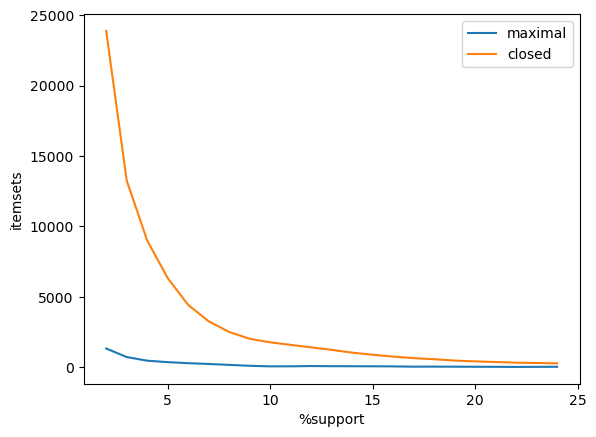

In [32]:
len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

<h2>RULES</h2>

In [33]:
# Define the range of confidence values to test
conf_values = range(50, 100, 5)

# Initialize a dictionary to store the results
results = {}

# Loop over the confidence values
for conf in conf_values:
    # Run the apriori algorithm
    rules = apriori(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")

    # Convert the rules to a DataFrame
    rules_df = pd.DataFrame(
        rules,
        columns=[
            "consequent",
            "antecedent",
            "abs_support",
            "%_support",
            "confidence",
            "lift",
        ],
    )

    # Sort the rules by lift
    rules_df = rules_df.sort_values(by="lift", axis=0, ascending=False)

    # Store the rules DataFrame in the results dictionary
    results[conf] = rules_df

# Now, 'results' is a dictionary where the keys are confidence values and the values are the corresponding rules DataFrames
avg_lifts = {}

# Loop over the results
for conf, rules_df in results.items():
    # Calculate the average lift for this confidence level
    avg_lift = rules_df['lift'].mean()

    # Store the average lift in the dictionary
    avg_lifts[conf] = avg_lift

# Find the confidence level with the highest average lift
best_conf = max(avg_lifts, key=avg_lifts.get)

print(f"The best value for conf is {best_conf} with an average lift of {avg_lifts[best_conf]}")


The best value for conf is 50 with an average lift of 1.1965257265117346


In [55]:
conf = 50
rules = apriori(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)
# Ordinare il DataFrame per lift in ordine decrescente
rules_df = rules_df.sort_values(by="lift", axis=0, ascending=False)

# Stampare i primi 30 record
rules_df.head(10)

,consequent,antecedent,abs_support,%_support,confidence,lift
37,"(-0.001, 17.0]_minutes","(short, 0_awardNominationsExcludeWins, 0_awards)",1070,6.518031,0.559039,5.495317
35,"(-0.001, 17.0]_minutes","(short, 0_awardNominationsExcludeWins, 0_awards, No episodes)",1070,6.518031,0.559039,5.495317
34,"(-0.001, 17.0]_minutes","(short, 0_awardNominationsExcludeWins, 0_awards, No episodes, No Adult)",1068,6.505848,0.558870,5.493656
36,"(-0.001, 17.0]_minutes","(short, 0_awardNominationsExcludeWins, 0_awards, No Adult)",1068,6.505848,0.558870,5.493656
50,"(-0.001, 17.0]_minutes","(short, 0_awards, No episodes)",1151,7.011452,0.558196,5.487033
49,"(-0.001, 17.0]_minutes","(short, 0_awards, No episodes, No Adult)",1149,6.999269,0.558038,5.485479
51,"(-0.001, 17.0]_minutes","(short, 0_awards, No Adult)",1149,6.999269,0.558038,5.485479
46,"(-0.001, 17.0]_minutes","(short, 0_awards, 0_videos, No episodes)",1099,6.694688,0.557868,5.483809
48,"(-0.001, 17.0]_minutes","(short, 0_awards, 0_videos)",1099,6.694688,0.557868,5.483809
45,"(-0.001, 17.0]_minutes","(short, 0_awards, 0_videos, No episodes, No Adult)",1097,6.682505,0.557702,5.482178


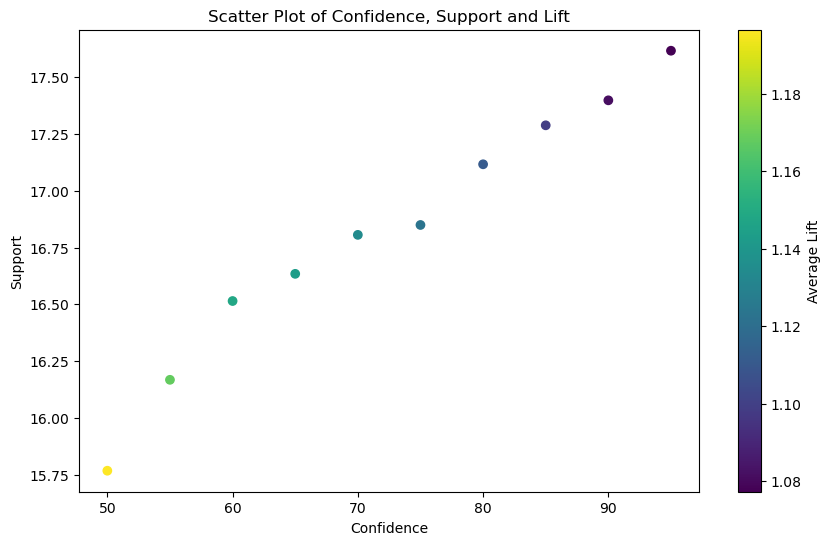

In [35]:
# Extract confidence, support and lift values from the results
conf_values = [conf for conf in results.keys()]
avg_lift_values = [avg_lift for avg_lift in avg_lifts.values()]
supp_values = [results[conf]['%_support'].mean() for conf in results.keys()]

# Create a new figure
plt.figure(figsize=(10, 6))

# Create a scatter plot
scatter = plt.scatter(conf_values, supp_values, c=avg_lift_values, cmap='viridis')

# Add a colorbar
plt.colorbar(scatter, label='Average Lift')

# Set the labels for the x and y axes
plt.xlabel('Confidence')
plt.ylabel('Support')

# Set the title of the plot
plt.title('Scatter Plot of Confidence, Support and Lift')

# Display the plot
plt.show()

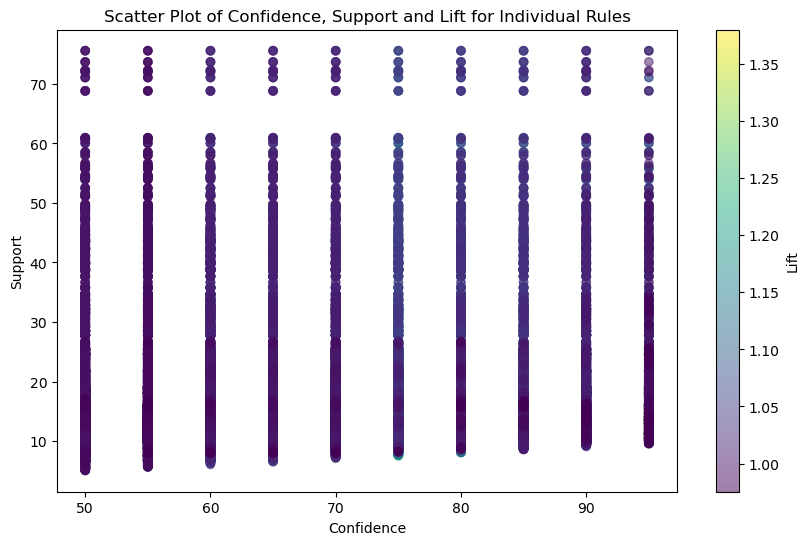

In [36]:
# Create a new figure
plt.figure(figsize=(10, 6))

# Loop over the results
for conf, rules_df in results.items():
    # Create a scatter plot for each set of rules
    plt.scatter([conf]*len(rules_df), rules_df['%_support'], c=rules_df['lift'], cmap='viridis', alpha=0.5)

# Add a colorbar
plt.colorbar(label='Lift')

# Set the labels for the x and y axes
plt.xlabel('Confidence')
plt.ylabel('Support')

# Set the title of the plot
plt.title('Scatter Plot of Confidence, Support and Lift for Individual Rules')

# Display the plot
plt.show()
     

In [37]:
rules_df[rules_df["consequent"] == "(-0.001, 17.0]_minutes"]

,consequent,antecedent,abs_support,%_support,confidence,lift


In [38]:
len_r = []
min_sup = 10
max_sup = 50
min_conf = 50
max_conf = 90
for i in range(min_sup, max_sup):  # support
    len_r_wrt_i = []
    for j in range(min_conf, max_conf):  # confidence
        rules = apriori(X, target="r", supp=i, zmin=zmin, conf=j, report="aScl")
        len_r_wrt_i.append(len(rules))  # study your characteristics/properties here

    len_r.append(len_r_wrt_i)
len_r = np.array(len_r)

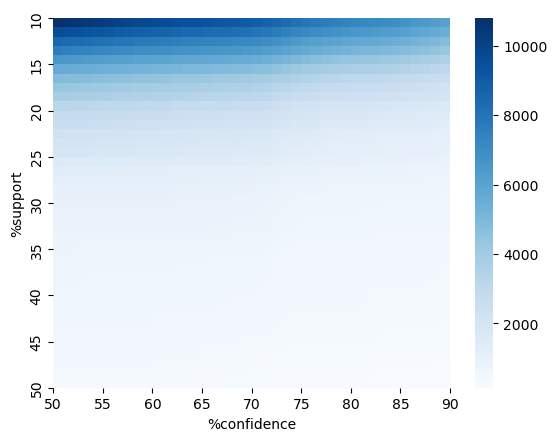

In [39]:
sns.heatmap(len_r, cmap="Blues", fmt='g')
plt.yticks(np.arange(0, max_sup-min_sup +1, 5), np.arange(min_sup, max_sup+1,5 ))
plt.xticks(np.arange(0, max_conf-min_conf+1, 5), np.arange(min_conf, max_conf+1, 5))
plt.xlabel("%confidence")
plt.ylabel("%support")
plt.show()

<h1> FP-GROWTH</h1>

In [40]:
from fim import fpgrowth

In [41]:
%%time
#7sec

# Define the parameter grid
supp_values = np.linspace(10, 50, 5)
zmin_values = np.arange(2, df.shape[1])

# Initialize a DataFrame to store the results
results = pd.DataFrame(columns=["supp", "zmin", "num_frequent_itemsets",
                                "num_closed_itemsets", "num_maximal_itemsets"])

# Loop over the parameter grid
for supp in supp_values:
    for zmin in zmin_values:
        # Run FPGROWTH for each type of itemset
        frequent_itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
        closed_itemsets = fpgrowth(X, target="c", supp=supp, zmin=zmin, report="S")
        maximal_itemsets = fpgrowth(X, target="m", supp=supp, zmin=zmin, report="S")

        # Compute some evaluation metric (in this case, the number of itemsets)
        num_frequent = len(frequent_itemsets)
        num_closed = len(closed_itemsets)
        num_maximal = len(maximal_itemsets)

        # Store the results
        results = pd.concat([results, pd.DataFrame([{"supp": supp, "zmin": zmin, "num_frequent_itemsets": num_frequent,
                                                     "num_closed_itemsets": num_closed, "num_maximal_itemsets": num_maximal}])],
                            ignore_index=True)

# Sort the results based on some criteria
results = results.sort_values(by=["num_frequent_itemsets", "num_closed_itemsets", "num_maximal_itemsets"], ascending=False)

# Print the best parameters
best_parameters = results.iloc[0]
print(f"Best parameters: supp={best_parameters['supp']}, zmin={best_parameters['zmin']}")


<timed exec>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


Best parameters: supp=10.0, zmin=2
CPU times: user 2.31 s, sys: 54 ms, total: 2.36 s
Wall time: 1.95 s


In [42]:
supp = 10  # 20%
zmin = 4  # minimum number of items per item set

itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

,frequent_itemset,support
0,"(0_awards, 0_videos, No episodes, No Adult)",72.033382
1,"(0_awardNominationsExcludeWins, 0_videos, No episodes, No Adult)",72.264864
2,"(0_awardNominationsExcludeWins, 0_awards, No episodes, No Adult)",73.684211
3,"(0_awardNominationsExcludeWins, 0_awards, 0_videos, No Adult)",75.566520
4,"(0_awardNominationsExcludeWins, 0_awards, 0_videos, No episodes, No Adult)",68.823099
...,...,...
2054,"(Excellent, 0_awards, 0_videos, No Adult)",10.495858
2055,"(Excellent, 0_awardNominationsExcludeWins, 0_videos, No Adult)",10.593324
2056,"(Excellent, 0_awardNominationsExcludeWins, 0_awards, No Adult)",10.715156
2057,"(Excellent, 0_awardNominationsExcludeWins, 0_awards, 0_videos, No Adult)",10.142544


<h2> fine fp</h2>

In [43]:
# Define the range of confidence values to test
conf_values = range(50, 100, 5)

# Initialize a dictionary to store the results
results = {}

# Loop over the confidence values
for conf in conf_values:
    # Run the apriori algorithm
    rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")

    # Convert the rules to a DataFrame
    rules_df = pd.DataFrame(
        rules,
        columns=[
            "consequent",
            "antecedent",
            "abs_support",
            "%_support",
            "confidence",
            "lift",
        ],
    )

    # Sort the rules by lift
    rules_df = rules_df.sort_values(by="lift", axis=0, ascending=False)

    # Store the rules DataFrame in the results dictionary
    results[conf] = rules_df

# Now, 'results' is a dictionary where the keys are confidence values and the values are the corresponding rules DataFrames
avg_lifts = {}

# Loop over the results
for conf, rules_df in results.items():
    # Calculate the average lift for this confidence level
    avg_lift = rules_df['lift'].mean()

    # Store the average lift in the dictionary
    avg_lifts[conf] = avg_lift

# Find the confidence level with the highest average lift
best_conf = max(avg_lifts, key=avg_lifts.get)

print(f"The best value for conf is {best_conf} with an average lift of {avg_lifts[best_conf]}")


The best value for conf is 50 with an average lift of 1.1965257265117346


In [44]:
conf = 50
rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)

,consequent,antecedent,abs_support,%_support,confidence,lift
0,No Adult,"(0_awards, 0_videos, No episodes)",11825,72.033382,0.967993,0.993782
1,No episodes,"(0_awards, 0_videos, No Adult)",11825,72.033382,0.906339,1.003606
2,0_videos,"(0_awards, No episodes, No Adult)",11825,72.033382,0.923035,1.022577
3,0_awards,"(0_videos, No episodes, No Adult)",11825,72.033382,0.908009,1.021930
4,No Adult,"(0_awardNominationsExcludeWins, 0_videos, No episodes)",11863,72.264864,0.968883,0.994695
...,...,...,...,...,...,...
10789,"(-0.001, 17.0]_minutes","(short, 1_regions, No episodes)",952,5.799220,0.537246,5.281096
10790,"(-0.001, 17.0]_minutes","(short, 1_regions, 0_videos, No Adult)",894,5.445906,0.537906,5.287585
10791,"(-0.001, 17.0]_minutes","(short, 1_regions, 0_videos, No episodes, No Adult)",894,5.445906,0.537906,5.287585
10792,"(-0.001, 17.0]_minutes","(short, 1_regions, 0_videos, No episodes)",895,5.451998,0.537861,5.287137


In [45]:
rules_df = pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)

rules_df['consequent'].unique()

array(['No Adult', 'No episodes', '0_videos', '0_awards',
       '0_awardNominationsExcludeWins', '0_criticReviews', '1_regions',
       '0_reviewsTotal', "['US']", 'tvEpisode', '(47.0, 58.0]_minutes',
       'movie', '(-0.001, 17.0]_minutes'], dtype=object)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16416 entries, 0 to 16415
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   rating                       16416 non-null  object
 1   awardWins                    16416 non-null  object
 2   totalImages                  16416 non-null  object
 3   totalVideos                  16416 non-null  object
 4   totalCredits                 16416 non-null  object
 5   criticReviewsTotal           16416 non-null  object
 6   titleType                    16416 non-null  object
 7   awardNominationsExcludeWins  16416 non-null  object
 8   canHaveEpisodes              16416 non-null  object
 9   isAdult                      16416 non-null  object
 10  numRegions                   16416 non-null  object
 11  userReviewsTotal             16416 non-null  object
 12  ratingCount                  16416 non-null  object
 13  countryOfOrigin              16

In [47]:
for title in df['titleType'].unique():
  print(f"Title Type: {title} -> {len(rules_df[rules_df['consequent'] == title])} rules")

Title Type: tvEpisode -> 517 rules
Title Type: videoGame -> 0 rules
Title Type: movie -> 9 rules
Title Type: tvSeries -> 0 rules
Title Type: video -> 0 rules
Title Type: tvMiniSeries -> 0 rules
Title Type: short -> 0 rules
Title Type: tvMovie -> 0 rules
Title Type: tvSpecial -> 0 rules
Title Type: tvShort -> 0 rules


In [48]:
for rat in df['rating'].unique():
  print(f"Rating: {rat} -> {len(rules_df[rules_df['consequent'] == rat])} rules")

Rating: Very High -> 0 rules
Rating: Medium-High -> 0 rules
Rating: Excellent -> 0 rules
Rating: High -> 0 rules
Rating: Slightly Low -> 0 rules
Rating: Medium -> 0 rules
Rating: Outstanding -> 0 rules
Rating: Medium-Low -> 0 rules
Rating: Very Low -> 0 rules
Rating: Low -> 0 rules
